# Carbon Emissions

This notebook explores the data on CO2 emissions over the past 250 years. 

[Data](https://github.com/owid/co2-data) were obtained from Our World in Data

In [1]:
data_dir = 'data/'

In [79]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

## Atmospheric CO$_2$ concentrations

* Historical atmospheric CO$_2$ concentrations are taken from the [Law Dome data](https://cdiac.ess-dive.lbl.gov/trends/co2/law_dome_methods.html). The file used was located at: (ftp://ftp.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/law/law2006.txt)[ftp://ftp.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/law/law2006.txt]

* Modern atmospheric CO$_2$ concentrations are annual averages from the [Mauna Loa observatory](https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html). The file used was located at: [ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_annmean_mlo.txt](ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_annmean_mlo.txt)

* Both files were processed to `.csv` files and headers were removed. The Law Dome data was filtered to only include CO$_2$ data.

* Raw versions of these files as downloaded are stored in `data/law2006.txt` and `data/co2_annmean_mlo.txt` (accessed September 16, 2020)


In [68]:
historical_atm_CO2 = pd.read_csv(data_dir + '/law2006_CO2_data.csv')
modern_atm_CO2 = pd.read_csv(data_dir + '/co2_annmean_mlo.csv')

In [75]:
historical_atm_CO2.columns = ['Year', 'CO2']
historical_atm_CO2['Year'] = historical_atm_CO2['Year'].astype(int)
historical_atm_CO2.set_index('Year')
modern_atm_CO2.columns = ['Year', 'CO2', 'Uncertainty']
modern_atm_CO2.set_index('Year')
atm_co2 = pd.merge(historical_atm_CO2, modern_atm_CO2, on='Year', how='outer')

In [87]:
atm_co2['CO2'] = np.nanmean([atm_co2['CO2_x'], atm_co2['CO2_y']],0)

## CO$_2$ emissions

* Historical CO$_2$ emissions are taken from [Our World in Data](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions). Data is available at: [https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv](https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv) (Accessed September 16, 2020)

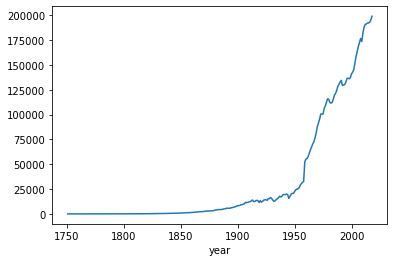

In [90]:
CO2_data = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')
annual_CO2_emissions = CO2_data.groupby('year')['co2'].sum().plot()